<a href="https://colab.research.google.com/github/LeishaR/Song-Popularity-Prediction/blob/main/LGBMRegressorSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from google.colab import drive

# Load your dataset (replace 'your_dataset.csv' with the actual dataset file path)
drive.mount('/content/gdrive')
data = pd.read_csv("gdrive/My Drive/feature_engineered_spotify_data.csv", encoding='latin1')

# Define your target variable (popularity score) and features
target = 'Popularity Score'
features = [
    'Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
    'Liveness', 'Valence', 'Tempo',
    'Title Word Count', 'Number of Artists', 'Collaboration',
    'Title Polarity', 'Title Subjectivity',
    'Avg Danceability per Artist', 'Avg Energy per Artist', 'Avg Loudness per Artist',
    'Avg Speechiness per Artist', 'Avg Acousticness per Artist', 'Avg Instrumentalness per Artist',
    'Avg Liveness per Artist', 'Avg Valence per Artist', 'Avg Tempo per Artist',
]

# Create a proxy popularity score based on the features (you can define your own formula)
data['Popularity Score'] = data[features].mean(axis=1)

# Split the data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use LGBMRegressor for regression
regressor = LGBMRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Print the predicted Popularity Scores
print("Predicted Popularity Scores:")
for idx, prediction in enumerate(y_pred):
    print(f"Song {idx + 1}: {prediction:.2f}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f"R-squared: {r2:.2f}")





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4528
[LightGBM] [Info] Number of data points in the train set: 792, number of used features: 23
[LightGBM] [Info] Start training from score 10.233180
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

In [ ]:
# Rank songs based on predicted Popularity Scores (descending order)
ranked_songs = data[['Name', 'Artists', 'Album', 'Release Date', 'Popularity Score']].copy()
ranked_songs['Rank'] = ranked_songs['Popularity Score'].rank(ascending=False, method='min')

# Sort the ranked songs by Rank
ranked_songs = ranked_songs.sort_values(by='Rank')

# Print the ranked songs
print("\nRanked Songs:")
print(ranked_songs[['Name', 'Artists', 'Popularity Score', 'Rank']])


Ranked Songs:
                                                  Name  \
419                                   Similar Features   
778                                    FourFiveSeconds   
721                              Islands In The Stream   
477  Weapon Of Choice (feat. Bootsy Collins) - Rema...   
30                    Single Ladies (Put a Ring on It)   
..                                                 ...   
517                                              Hello   
960                     The Weight (with Jimmy Barnes)   
643                                   We Are The World   
97                                      Sweet Caroline   
875                               Don't Worry Be Happy   

                               Artists  Popularity Score   Rank  
419                  Melissa Etheridge         17.843704    1.0  
778  Rihanna,Kanye West,Paul McCartney         17.822017    2.0  
721          Kenny Rogers,Dolly Parton         17.783400    3.0  
477         Fatboy Slim,

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.04
Root Mean Squared Error (RMSE): 0.20
Mean Absolute Error (MAE): 0.13
R-squared (R2): 0.99


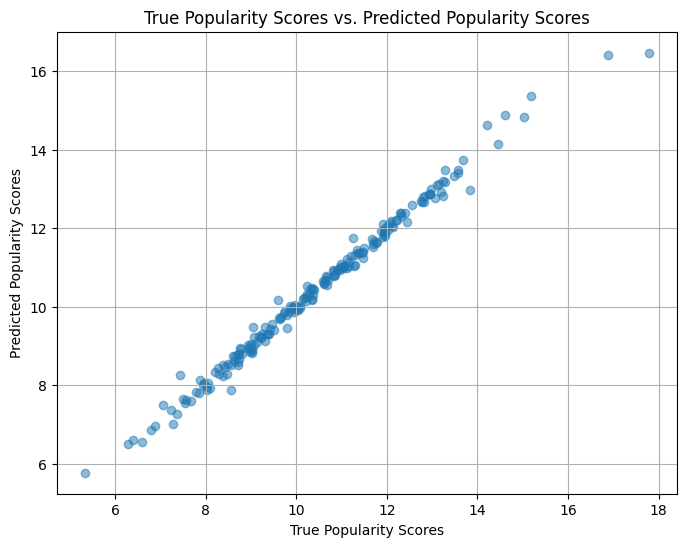

In [ ]:
# Visualize the relationship between true popularity scores and predicted popularity scores
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Popularity Scores vs. Predicted Popularity Scores')
plt.xlabel('True Popularity Scores')
plt.ylabel('Predicted Popularity Scores')
plt.grid(True)
plt.show()


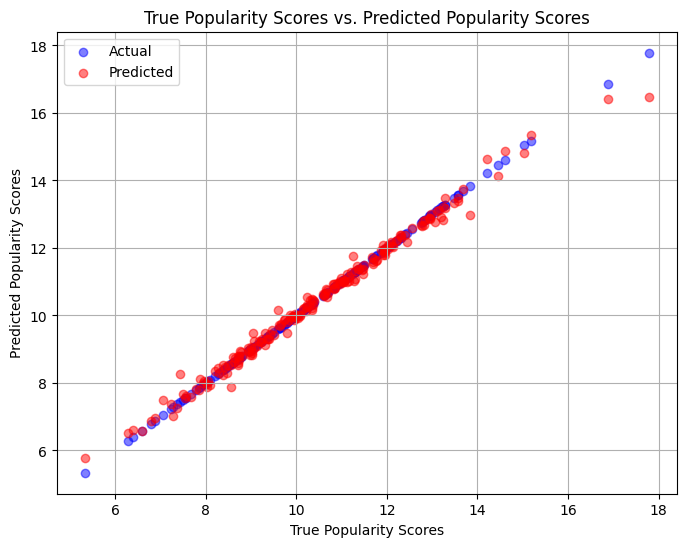

In [ ]:
# Create a scatter plot with different colors for actual and predicted values
plt.figure(figsize=(8, 6))

# Plot actual values (y_test) in blue
plt.scatter(y_test, y_test, color='blue', label='Actual', alpha=0.5)

# Plot predicted values (y_pred) in red
plt.scatter(y_test, y_pred, color='red', label='Predicted', alpha=0.5)

plt.title('True Popularity Scores vs. Predicted Popularity Scores')
plt.xlabel('True Popularity Scores')
plt.ylabel('Predicted Popularity Scores')
plt.grid(True)

# Add a legend to differentiate between actual and predicted values
plt.legend()

plt.show()

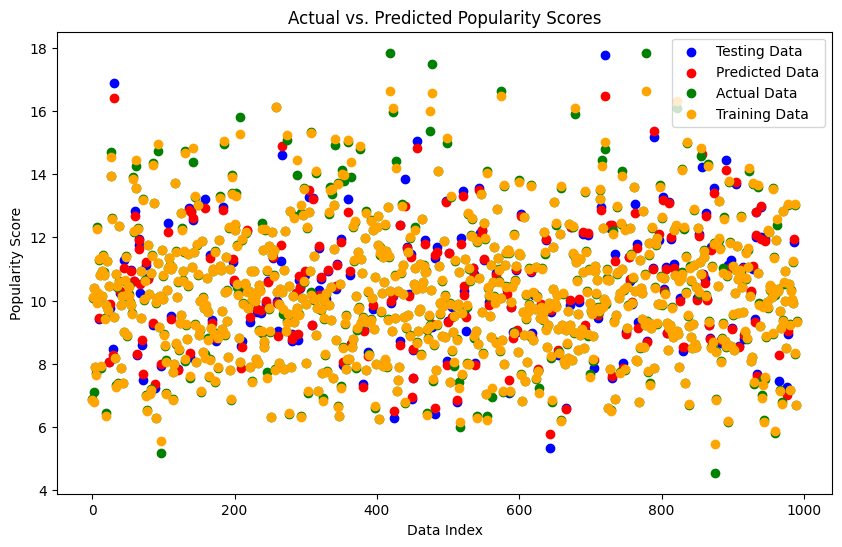

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))

# Plotting the actual data for testing set
plt.scatter(X_test.index, y_test, color='blue', label='Testing Data')

# Plotting the predicted data for testing set
plt.scatter(X_test.index, y_pred, color='red', label='Predicted Data')

# Plotting the actual data for training set
plt.scatter(X_train.index, y_train, color='green', label='Actual Data')

# Plotting the predicted data for training set
plt.scatter(X_train.index, regressor.predict(X_train), color='orange', label='Training Data')

plt.title('Actual vs. Predicted Popularity Scores')
plt.xlabel('Data Index')
plt.ylabel('Popularity Score')
plt.legend()
plt.show()